In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, classification_report, plot_confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
%matplotlib inline


In [2]:
df = pd.read_csv('/Users/emre/Documents/drinking_water/water_potability.csv')

# Basic Information of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [6]:
df.isnull().sum()

index              0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
df.head()

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


### Exploratory Data Analysis

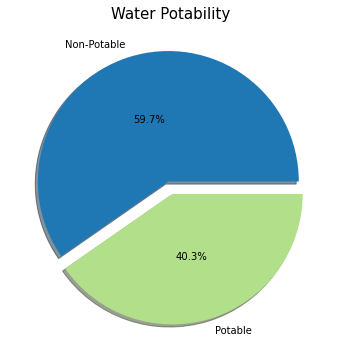

In [8]:
labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0], df['Potability'].value_counts()[1]]
fig1, ax1 = plt.subplots(figsize=(15, 6))
ax1.pie(data, labels = labels, explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = ['#1f78b4','#b2df8a'])
plt.title("Water Potability", fontsize=15);
plt.show()

### Correlation

<AxesSubplot:>

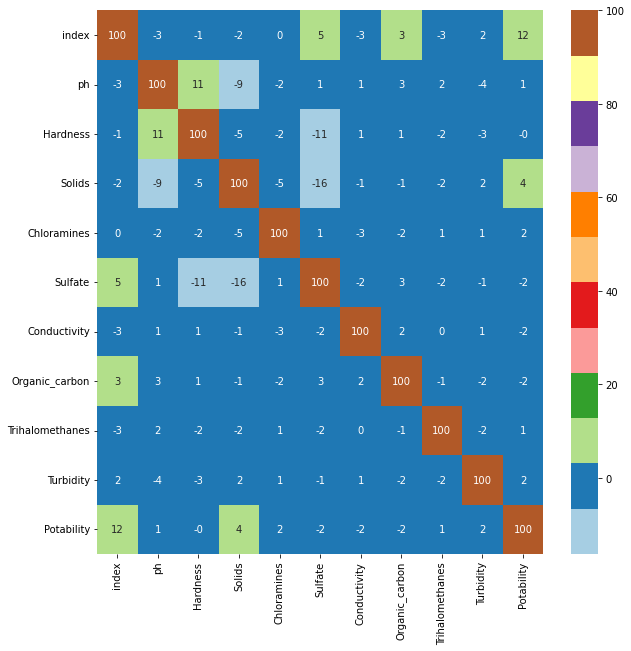

In [9]:
new_df = pd.get_dummies(df)
plt.figure(figsize=(10, 10))
corr = new_df.corr()
sns.heatmap(corr*100, cmap="Paired", annot= True, fmt=".0f")

### Relationship between Trihalomethanes and Chloramines
* THMs are chemicals which may be found in water treated with chlorine.

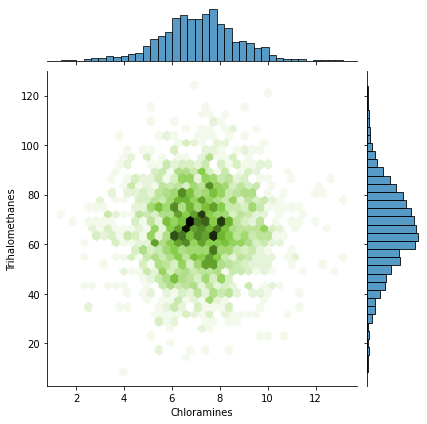

In [10]:
sns.jointplot(x="Chloramines", y="Trihalomethanes", data=df, kind="hex", marginal_kws={'color': '#1f78b4'},color='#b2df8a');


### Distribution of dataset

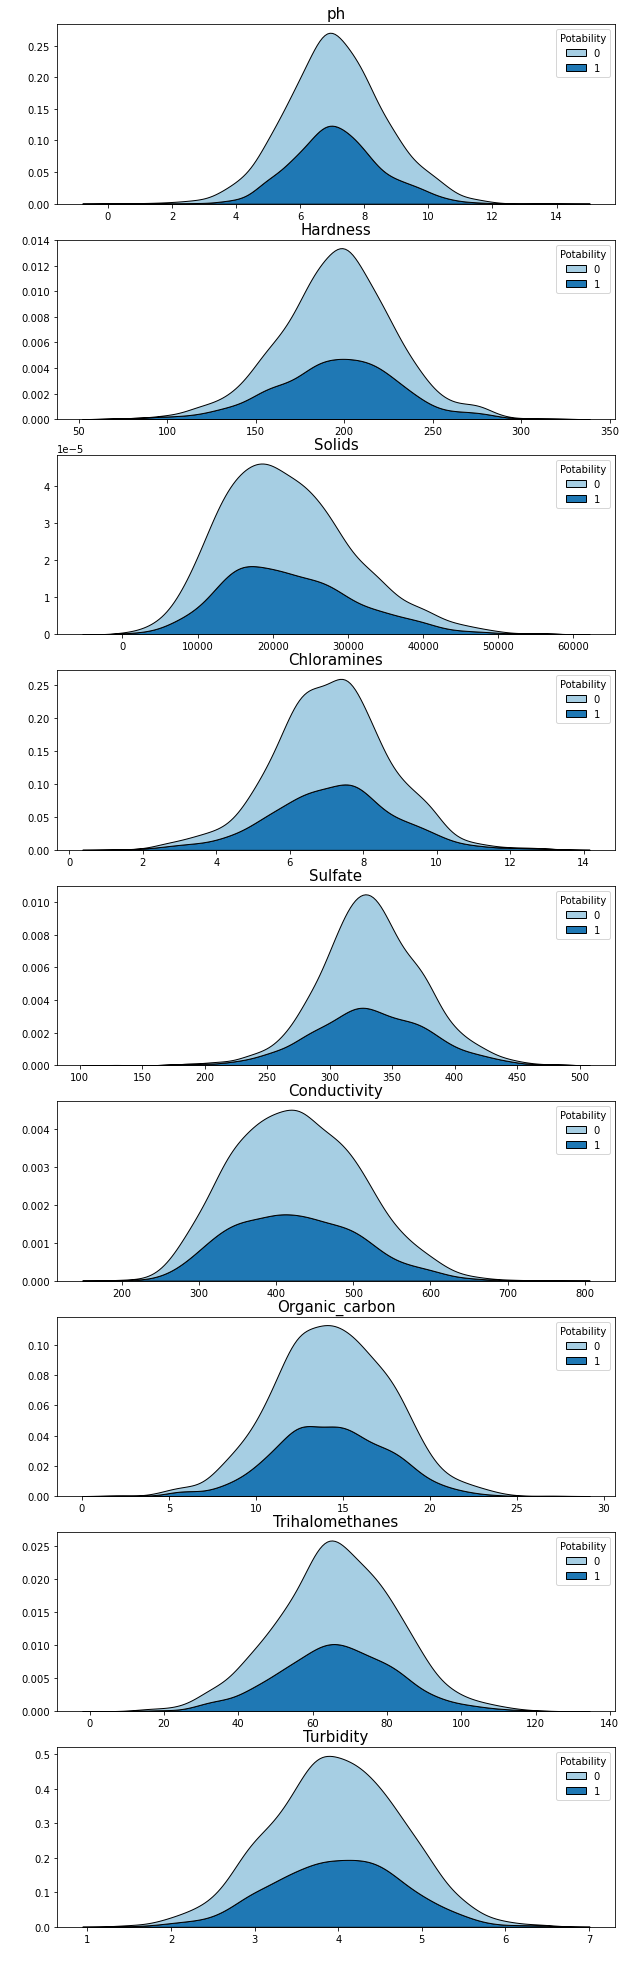

In [11]:
fig, ax = plt.subplots(nrows=9, figsize=(10, 35))
count=0
for cols in list(df.iloc[:,1:-1].columns):
    sns.kdeplot(df[cols], fill=True, alpha=1, hue = df['Potability'], 
                palette='Paired', multiple='stack', ax=ax[count]).set_title(cols, fontsize=15)
    
    ax[count].set_xlabel(' ')
    ax[count].set_ylabel(' ')
    count=count++1  
plt.show()


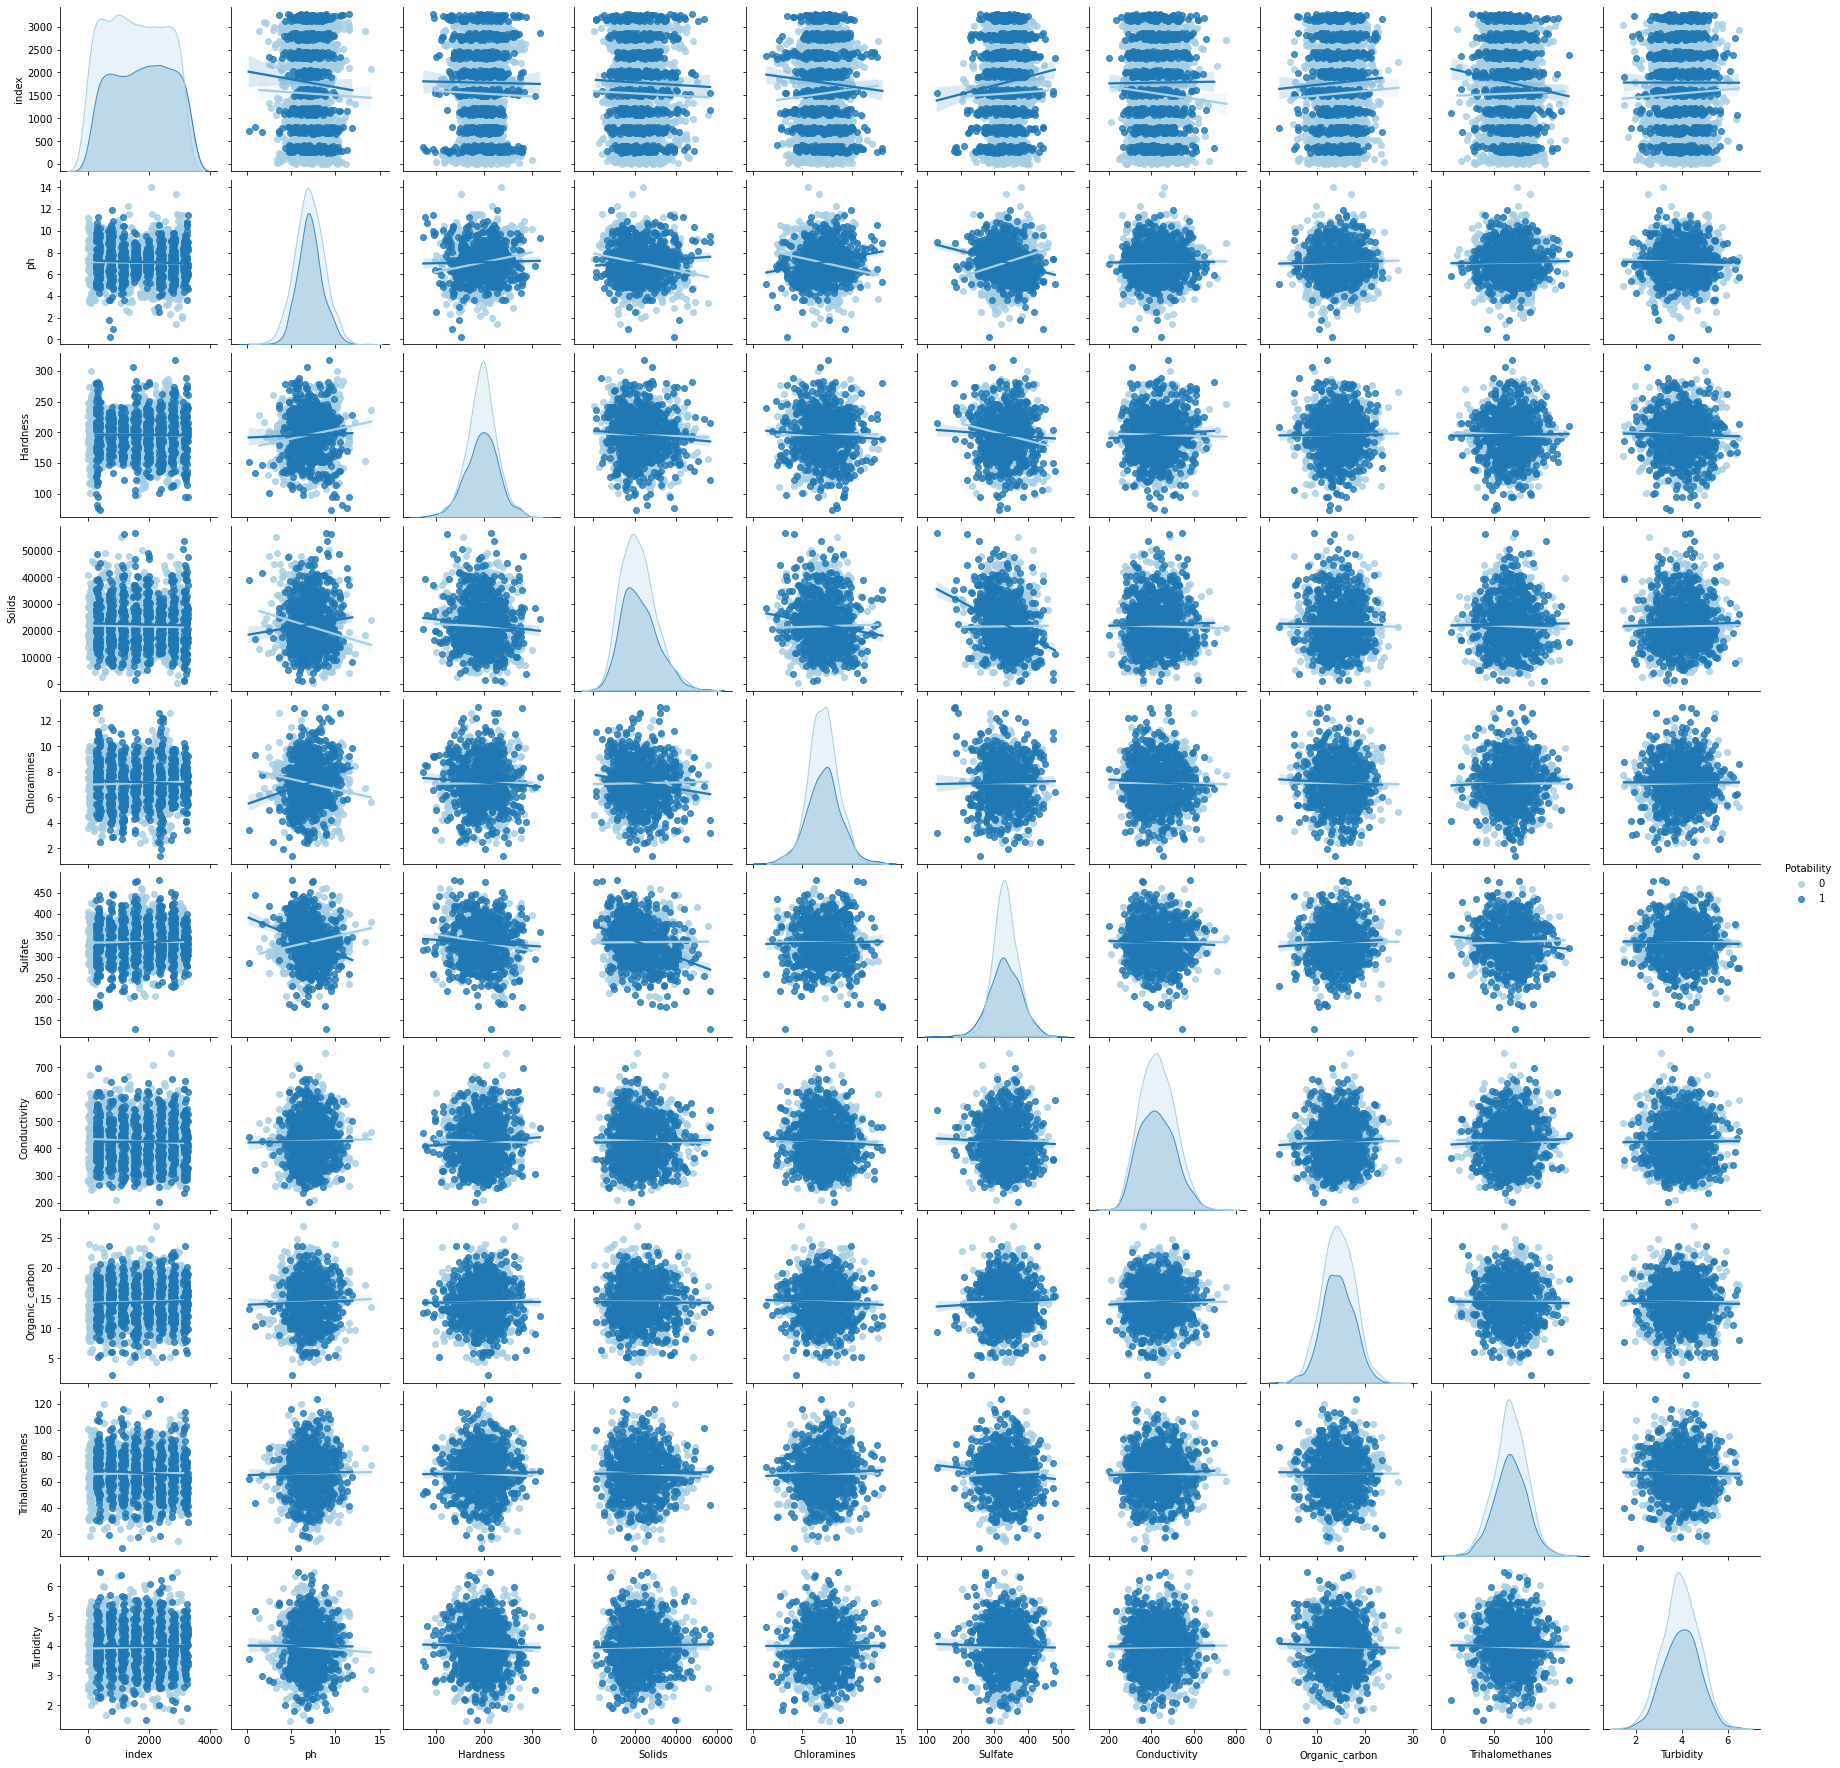

In [12]:
ax = sns.pairplot(df, hue="Potability",kind="reg",palette="Paired")
plt.show()

### PREPARING THE DATA 

In [13]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values

In [14]:
x_train, x_test,y_train,y_test = train_test_split(X, Y,test_size=0.2)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

### Modelling

In [16]:
def model_evaluate(model, test):
    y_pred = model.predict(test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    categories = ['Potable', 'Not Potable']
    
    sns.heatmap(cm, cmap = 'Blues', fmt = '', annot = True,
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

LogisticRegression got 58.80% Accuracy.
SVC got 71.96% Accuracy.
GaussianNaiveBayes got 63.27% Accuracy.
Bernoulli got 59.55% Accuracy.
KneighborsClassifier got 67.99% Accuracy.
DecisionTree got 95.03% Accuracy.
RandomForest got 78.41% Accuracy.
AdaBoostClassifier got 95.03% Accuracy.
[18:29:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier got 95.03% Accuracy.
LGBMClassifier got 96.27% Accuracy.


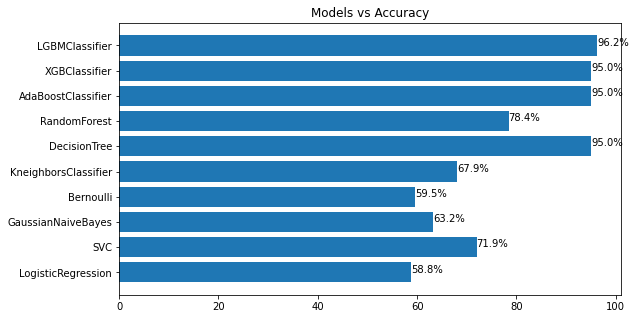

In [17]:
all_models = {'LogisticRegression':LogisticRegression(random_state = 0), 
              'SVC':SVC(), 
              'GaussianNaiveBayes':GaussianNB(), 
              'Bernoulli':BernoulliNB(), 
              'KneighborsClassifier':KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski'), 
              'DecisionTree':DecisionTreeClassifier(random_state = 0), 
              'RandomForest':RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),
              'AdaBoostClassifier':AdaBoostClassifier(n_estimators = 50),
              'XGBClassifier': XGBClassifier(n_estimators = 100),
              'LGBMClassifier': LGBMClassifier(objective = 'binary')
         }
model_names = []
model_scores = []

for model_name in all_models:
    pipeline = make_pipeline(StandardScaler(), all_models[model_name])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    model_names.append(model_name)
    model_scores.append(accuracy * 100)
    print(f"{model_name} got {str(accuracy*100)[:5]}% Accuracy.")

plt.figure(figsize = (9,5))
plt.barh(model_names, model_scores)
  
for index, value in enumerate(model_scores):
    plt.text(value, index,
             str(value)[:4]+"%")

plt.title("Models vs Accuracy")
plt.show()

## Is it okay to compare models on the basis of accuracy only?

* **No, that would be wrong. It would not be right to only look at the accuracy while examining the models. Model selection should be made according to the distribution of the data.**

### So why did we open this pipeline?
* **For this notebook, we examined the effect of different models on near-normal data.**

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       248
           1       0.96      0.94      0.95       155

    accuracy                           0.96       403
   macro avg       0.96      0.96      0.96       403
weighted avg       0.96      0.96      0.96       403

Train Score :  1.0
Test Score :  0.9788645730539269


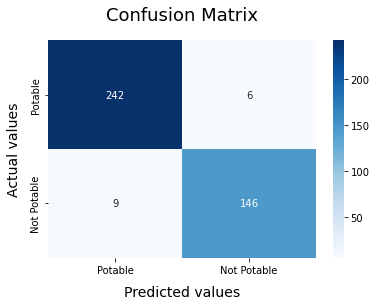

In [18]:
model = LGBMClassifier(objective="binary")
scores = cross_validate(model, X_train, y_train, return_train_score=True, n_jobs=-1)
evaluation = [( X_train, y_train), ( X_test, y_test)]
model.fit(X_train, y_train)

model_evaluate(model, X_test)
print("Train Score : ", np.mean(scores['train_score']))
print("Test Score : ", np.mean(scores['test_score']))